In [1]:
import numpy as np
from EigenmarkovDiffusion import EigenmarkovDiffusion
from SpectralRxnDiffusion import SpectralRxnDiffusion


eigenmarkov = EigenmarkovDiffusion(
    n_particles=58,
    n_spatial_locs=101,
    n_time_pts=100,
    particle_start_loc=58,
    scaling_factor=2,
)
n_time_pts = 100
emd_eig_values, emd_eig_vectors, idx = eigenmarkov.get_eigenvalues_and_vectors(
    print_output=False
)
print(emd_eig_values)

time = np.array(range(n_time_pts))
emd_modes = []
for λ in emd_eig_values:
    emd_mode = eigenmarkov.get_eigenmode(λ, time)
    emd_modes.append(emd_mode)


emd_modes = np.array(emd_modes)
emd_modes


[0.         0.0001357  0.00054265 0.00122048 0.00216851 0.00338584
 0.00487129 0.00662342 0.00864053 0.01092067 0.01346164 0.01626098
 0.01931598 0.02262369 0.0261809  0.02998418 0.03402984 0.03831397
 0.04283242 0.04758084 0.05255461 0.05774893 0.06315877 0.06877891
 0.0746039  0.0806281  0.0868457  0.09325067 0.09983682 0.10659777
 0.11352699 0.12061778 0.12786326 0.13525644 0.14279016 0.15045713
 0.15824993 0.16616103 0.17418278 0.1823074  0.19052705 0.19883376
 0.20721951 0.21567618 0.22419559 0.2327695  0.24138961 0.25004758
 0.25873504 0.26744359 0.27616479 0.28489021 0.29361141 0.30231996
 0.31100742 0.31966539 0.3282855  0.33685941 0.34537882 0.35383549
 0.36222124 0.37052795 0.3787476  0.38687222 0.39489397 0.40280507
 0.41059787 0.41826484 0.42579856 0.43319174 0.44043722 0.44752801
 0.45445723 0.46121818 0.46780433 0.4742093  0.4804269  0.4864511
 0.49227609 0.49789623 0.50330607 0.50850039 0.51347416 0.51822258
 0.52274103 0.52702516 0.53107082 0.5348741  0.53843131 0.54173

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 0.99986431, 0.99972864, ..., 0.98692372, 0.98678981,
        0.98665592],
       [1.        , 0.99945749, 0.99891528, ..., 0.94872399, 0.94820931,
        0.9476949 ],
       ...,
       [1.        , 0.57130359, 0.3263878 , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.57091648, 0.32594563, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.57068419, 0.32568045, ..., 0.        , 0.        ,
        0.        ]])

In [6]:
def get_ca_init_loc():
    # VDCC
    vdcc_loc = 2.35  # um

    return vdcc_loc


def get_ca_init_idx(n_space_pts):
    vdcc_loc = get_ca_init_loc()

    z = 4  # um
    dx = z / n_space_pts

    return int(vdcc_loc / dx)


n_time_pts = 100  # number of time points
n_space_pts = 101 
ca_init_idx = get_ca_init_idx(n_space_pts)

# Changed from 300 for a more 1-1 comparison
n_eigenmodes = 101

# Spectral Method (calbindin reactions)
sd = SpectralRxnDiffusion(
    n_spatial_locs=n_space_pts,
    n_time_pts=n_time_pts,
    impulse_idx=ca_init_idx,
    n_eigenmodes=n_eigenmodes,
)

# SPECTRAL DIFFUSION

# sd.plot_diffusion([0, 1, 5, 20, 40, 50, 100])

sd.solve_dTdt(
    save_dir=f"../data/spectral-diffusion/eigenmode-exps/{n_eigenmodes}/T.npy"
)


sd.simulate_diffusion()
test = np.load(f"../data/spectral-diffusion/eigenmode-exps/{n_eigenmodes}/T.npy")
# srd_modes = np.zeroes((sd.spatial_mesh.shape, sd.u_diff))


Initializing dTdt solver...
Solving dTdt...
Initializing solution array...
Beginning simulation...
Time step:  0
Time step:  10
Time step:  20
Time step:  30
Time step:  40
Time step:  50
Time step:  60
Time step:  70
Time step:  80
Time step:  90
Simulation complete!


In [11]:
# sd_modes = []
# for n in range(n_eigenmodes):
#     λ = sd.lambda_value(n)
#     sd_mode = eigenmarkov.get_eigenmode(λ, time) 
#     sd_modes.append(sd_mode)

sd_modes = []
sd_eig_values = []
for n in range(n_eigenmodes):
    λ = sd.lambda_value(n)
    sd_eig_values.append(λ)
    sd_mode = sd.get_eigenmode(n, time)
    sd_modes.append(sd_mode)


sd_modes = np.array(sd_modes)

In [12]:
print(sd_modes)
print(emd_modes)

[[1.         1.         1.         ... 1.         1.         1.        ]
 [1.         0.9998643  0.99972862 ... 0.98692268 0.98678875 0.98665485]
 [1.         0.99945732 0.99891493 ... 0.94870789 0.94819304 0.94767847]
 ...
 [1.         0.27162561 0.07378047 ... 0.         0.         0.        ]
 [1.         0.2644601  0.06993914 ... 0.         0.         0.        ]
 [1.         0.25741374 0.06626183 ... 0.         0.         0.        ]]
[[1.         1.         1.         ... 1.         1.         1.        ]
 [1.         0.99986431 0.99972864 ... 0.98692372 0.98678981 0.98665592]
 [1.         0.99945749 0.99891528 ... 0.94872399 0.94820931 0.9476949 ]
 ...
 [1.         0.57130359 0.3263878  ... 0.         0.         0.        ]
 [1.         0.57091648 0.32594563 ... 0.         0.         0.        ]
 [1.         0.57068419 0.32568045 ... 0.         0.         0.        ]]


In [29]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def make_eigenmode_plots(emd_eigenvalues, sd_eigenvalues, n_time_pts):
    """
    Plots eigenmodes for EigenMarkov diffusion and Spectral Diffusion.

    Parameters:
    - emd_eigenvalues: list or array of eigenvalues for EigenMarkov diffusion
    - sd_eigenvalues: list or array of eigenvalues for Spectral Diffusion
    - n_time_pts: number of time points to plot
    """
    time = np.array(range(n_time_pts)) # Generate time points
    alpha = 1  # Initial transparency level

    # Plot EigenMarkov diffusion eigenmodes
    for λ in emd_eigenvalues:
        plt.plot(
            time,
            eigenmarkov.get_eigenmode(λ, time),  # You need to define this function
            c="red",
            alpha=alpha,
        )
        alpha *= 0.66  # Decrease transparency for the next eigenmode

    # Reset transparency level for Spectral Diffusion plots
    alpha = 1  

    # Plot Spectral Diffusion eigenmodes
    for λ in sd_eigenvalues:
        plt.plot(
            time,
            sd.get_eigenmode(λ, time),  # You need to define this function
            c="blue",
            alpha=alpha,
        )
        alpha *= 0.66  # Decrease transparency for the next eigenmode

    plt.xlabel("t [µs]")
    plt.ylabel("$e^{-λt}$")
    plt.title("Spectral Diffusion vs. EigenMarkov Diffusion in Modal Space")
    # Custom legend entries
    red_patch = mpatches.Patch(color='red', label='EigenMarkov')
    blue_patch = mpatches.Patch(color='blue', label='Spectral Diffusion')
    plt.legend(handles=[red_patch, blue_patch])
    plt.tight_layout()
    plt.show()

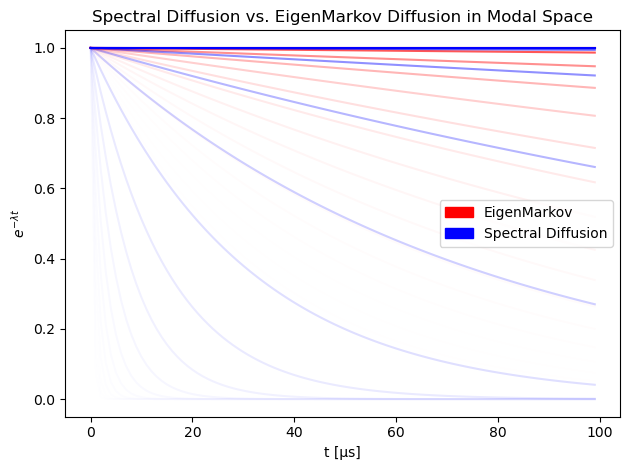

In [30]:
make_eigenmode_plots(emd_eig_values, sd_eig_values, n_time_pts)